In [1]:
from light_curves import LightCurve
from exposures import Calexp
from task import Run
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ratio_lc_area = [0.05,0.1,0.15]
radius = [20,11,10,9]
problems = []
# start = False
for n in n_points:
    for rad in radius:
        # if n==70 and lvl==11:
        #     start=True
        # if start:
        print(f"||||||||||||||----------- POINT: {n} ------ LEVEL: {lvl} -----------||||||||||||||")
        process = Run(name = f"run_{n}pts_{rad}radius", query_calexps="overlap", radius=rad)
        process.inject_task()
        schema = process.measure_task()
        params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
        process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145)
        for p in params[1:]:
            process.add_lc(p, dist=0.2)
        # process.sky_map()
        process.log_task("Add and simulate light curves")
        for j, dataId in enumerate(process.calexp_dataIds[:10]):
            print(f" ------ CALEXP {j+1}/10 ------")
            calexp = Calexp(dataId)
            # ax = calexp.plot() # plotear cada calexp con los puntos a inyectar y chequear si efectivamente contiene la cantidad que la funcion de inyeccion dice que contiene
            injected_exp, injected_points = process.inject_calexp(calexp, save_fit=f"calexp_{j}.fit")
            if injected_exp != None:
                sources = process.measure_calexp(injected_exp, schema)
                flux, flux_err = process.find_flux(sources, injected_points, save=dataId)
                for f, ferr, lc_idx in zip(flux, flux_err, injected_points):
                    lc = process.inj_lc[lc_idx]
                    mag, mag_err = calexp.get_mag(f, ferr)
                    lc.add_mag(mag, mag_err, dataId)
                    print(f"ra = {lc.ra}, dec = {lc.dec}")
                    print("Measured ", mag, mag_err)
                    print("Injected ", lc.data["mag_sim"][j])
                    if abs(mag-lc.data["mag_sim"][j])>1:
                        problems.append((calexp,sources))
                
        process.save_lc()
        process.save_time_log()
        process.time_analysis()
        process.sky_map()
    


||||||||||||||----------- POINT: 50 ------ LEVEL: 9 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 2353633 - HTM_level=9 (bounded by a circle of radius ~561.27 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 514 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


 ------ CALEXP 1/10 ------
Points injected: 2
[10, 37]


Searching in lc 10
Searching in lc 37
ra = 57.54856374440088, dec = -32.672283712542615
Measured  19.222914813479196 0.005872746949709428
Injected  19.224290195098348
ra = 57.5238573093214, dec = -32.65873030510227
Measured  22.501706256835273 0.07450376618500265
Injected  22.53041264407794
 ------ CALEXP 2/10 ------
Points injected: 40
[0, 1, 3, 4, 5, 6, 7, 8, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49]


Searching in lc 0
Searching in lc 1
Searching in lc 3
Searching in lc 4
Searching in lc 5
Searching in lc 6
Searching in lc 7
Searching in lc 8
Searching in lc 11
Searching in lc 13
Searching in lc 15
Searching in lc 16
Searching in lc 17
Searching in lc 18
Searching in lc 19
Searching in lc 20
Searching in lc 21
Searching in lc 22
Searching in lc 23
Searching in lc 24
Searching in lc 25
Searching in lc 26
Searching in lc 27
Searching in lc 28
Searching in lc 29
Searching in lc 31
Searching in lc 33
Searching in lc 34
Searching in lc 35
Searching in lc 36
Searching in lc 38
Searching in lc 41
Searching in lc 42
Searching in lc 43
Searching in lc 44
Searching in lc 45
Searching in lc 46
Searching in lc 47
Searching in lc 48
Searching in lc 49
ra = 57.59451632893858, dec = -32.481152201226145
Measured  17.994147885869737 0.0029192126371771986
Injected  17.999800399179982
ra = 57.62069358964389, dec = -32.637404611605604
Measured  18.11694144469525 0.0031200636540546015
Injected  18.12224

Searching in lc 2
Searching in lc 9
Searching in lc 10
Searching in lc 12
Searching in lc 14
Searching in lc 18
Searching in lc 22
Searching in lc 32
Searching in lc 37
Searching in lc 39
Searching in lc 40
ra = 57.50562978570095, dec = -32.64848910394702
Measured  18.23195299652733 0.0033920238389218583
Injected  18.244424459038253
ra = 57.50176964817662, dec = -32.650050826181044
Measured  19.09372034299661 0.005675824029410904
Injected  19.101567316181107
ra = 57.54856374440088, dec = -32.672283712542615
Measured  19.20734232670568 0.006122585196165755
Injected  19.224016295772945
ra = 57.50260290504448, dec = -32.648282998240724
Measured  19.4592400787533 0.007236558614661087
Injected  19.46891425495662
ra = 57.48591383505169, dec = -32.67266564816517
Measured  19.712923836359565 0.00862797521406421
Injected  19.713812214140294
ra = 57.5420984482355, dec = -32.628960709340554
Measured  20.203353892812817 0.012319583422777237
Injected  20.20360813250764
ra = 57.54996685473852, dec =

Searching in lc 1
Searching in lc 4
Searching in lc 7
Searching in lc 11
Searching in lc 21
Searching in lc 23
Searching in lc 38
Searching in lc 43
Searching in lc 45
Searching in lc 46
ra = 57.62069358964389, dec = -32.637404611605604
Measured  18.12049820168802 0.003190601441225655
Injected  18.121975479446416
ra = 57.65619144708684, dec = -32.670686770763616
Measured  18.484947227730707 0.003918831069513166
Injected  18.489322418221924
ra = 57.602782281878554, dec = -32.64458501715527
Measured  18.842999589881785 0.0048583516142788755
Injected  18.856669356997436
ra = 57.625969352314506, dec = -32.642555069726214
Measured  19.329215552180166 0.006624205204266497
Injected  19.346465275364782
ra = 57.69732847482308, dec = -32.65039600467563
Measured  22.153503173176397 0.06155367990250683
Injected  20.570955071283148
ra = 57.760519965358306, dec = -32.666483722841676
Measured  23.294236151283112 0.17144805464025922
Injected  20.815853030466823
ra = 57.666727345536714, dec = -32.67384

Loading calexps: 100%|██████████| 514/514 [19:01<00:00,  2.22s/it]


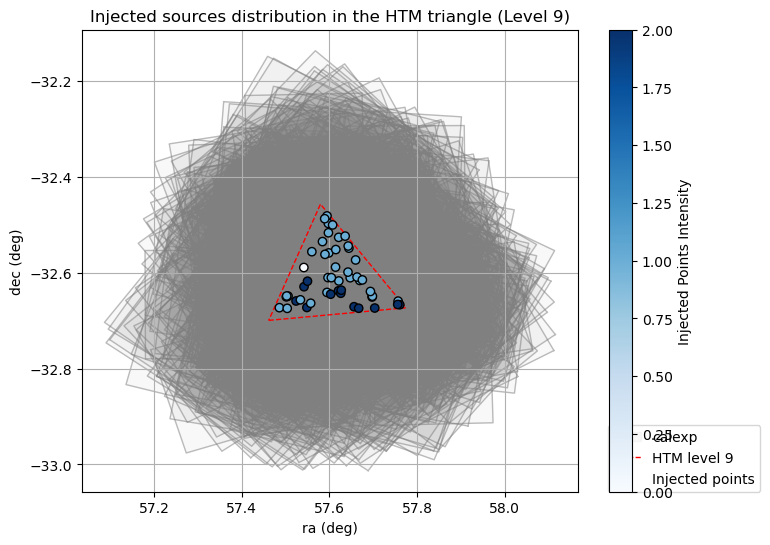

||||||||||||||----------- POINT: 50 ------ LEVEL: 10 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 9414534 - HTM_level=10 (bounded by a circle of radius ~280.63 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 313 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


 ------ CALEXP 1/10 ------
Points injected: 37
[0, 1, 2, 3, 4, 5, 8, 10, 12, 13, 14, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 40, 41, 42, 43, 44, 45, 48, 49]


Searching in lc 0
Searching in lc 1
Searching in lc 2
Searching in lc 3
Searching in lc 4
Searching in lc 5
Searching in lc 8
Searching in lc 10
Searching in lc 12
Searching in lc 13
Searching in lc 14
Searching in lc 16
Searching in lc 18
Searching in lc 19
Searching in lc 21
Searching in lc 22
Searching in lc 23
Searching in lc 24
Searching in lc 25
Searching in lc 26
Searching in lc 27
Searching in lc 28
Searching in lc 29
Searching in lc 30
Searching in lc 32
Searching in lc 33
Searching in lc 34
Searching in lc 36
Searching in lc 37
Searching in lc 40
Searching in lc 41
Searching in lc 42
Searching in lc 43
Searching in lc 44
Searching in lc 45
Searching in lc 48
Searching in lc 49
ra = 57.59451632893858, dec = -32.481152201226145
Measured  17.994321805644834 0.0029193834878855868
Injected  17.999800399179982
ra = 57.642449626863595, dec = -32.528778228304276
Measured  18.119950144765028 0.0031173663469491212
Injected  18.12224937877182
ra = 57.61497025995724, dec = -32.5586064127

Searching in lc 0
Searching in lc 1
Searching in lc 2
Searching in lc 3
Searching in lc 4
Searching in lc 5
Searching in lc 6
Searching in lc 7
Searching in lc 8
Searching in lc 9
Searching in lc 11
Searching in lc 12
Searching in lc 13
Searching in lc 14
Searching in lc 15
Searching in lc 16
Searching in lc 17
Searching in lc 18
Searching in lc 19
Searching in lc 20
Searching in lc 21
Searching in lc 22
Searching in lc 23
Searching in lc 24
Searching in lc 25
Searching in lc 26
Searching in lc 27
Searching in lc 28
Searching in lc 29
Searching in lc 30
Searching in lc 33
Searching in lc 34
Searching in lc 35
Searching in lc 36
Searching in lc 37
Searching in lc 38
Searching in lc 39
Searching in lc 40
Searching in lc 41
Searching in lc 42
Searching in lc 43
Searching in lc 44
Searching in lc 45
Searching in lc 46
Searching in lc 47
Searching in lc 48
Searching in lc 49
ra = 57.59451632893858, dec = -32.481152201226145
Measured  17.996999024786266 0.0028472018252343034
Injected  17.999

Searching in lc 1
Searching in lc 4
Searching in lc 10
Searching in lc 16
Searching in lc 21
Searching in lc 23
Searching in lc 26
Searching in lc 28
Searching in lc 32
Searching in lc 33
Searching in lc 36
Searching in lc 37
Searching in lc 40
ra = 57.642449626863595, dec = -32.528778228304276
Measured  18.120655816195054 0.0030403256438734116
Injected  18.121975430144985
ra = 57.62507957213043, dec = -32.54047556828128
Measured  18.487568142717915 0.003692680323440165
Injected  18.489322368920494
ra = 57.65546972705306, dec = -32.565209837573605
Measured  19.224264741452238 0.005586262193894199
Injected  19.224016246471514
ra = 57.635082998062245, dec = -32.54861914969935
Measured  19.9616519132696 0.008944834903753012
Injected  19.958710124022534
ra = 57.641885074952185, dec = -32.541696617862684
Measured  20.5684113930279 0.013688985332089202
Injected  20.570955021981717
ra = 57.62870587387553, dec = -32.51586083901543
Measured  20.801332329184937 0.016322077271657076
Injected  20.

Loading calexps:   9%|▉         | 29/313 [00:57<10:11,  2.15s/it]

In [ ]:
n_points = [50,100,150]
levels = [9,10,11,12]
problems = []
# start = False
for n in n_points:
    for lvl in levels:
        # if n==70 and lvl==11:
        #     start=True
        # if start:
        print(f"||||||||||||||----------- POINT: {n} ------ LEVEL: {lvl} -----------||||||||||||||")
        process = Run(name = f"run_{n}pts_{lvl}lvl", htm_level=lvl)
        process.inject_task()
        schema = process.measure_task()
        params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
        process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145)
        for p in params[1:]:
            process.add_lc(p, dist=0.00000001)
        # process.sky_map(calexps=False)
        process.log_task("Add and simulate light curves")
        for j, dataId in enumerate(process.calexp_dataIds[:5]):
            print(f" ------ CALEXP {j+1}/10 ------")
            calexp = Calexp(dataId)
            # ax = calexp.plot() # plotear cada calexp con los puntos a inyectar y chequear si efectivamente contiene la cantidad que la funcion de inyeccion dice que contiene
            injected_exp, injected_points = process.inject_calexp(calexp, save_fit=f"calexp_{j}.fit")
            if injected_exp != None:
                sources = process.measure_calexp(injected_exp, schema)
                flux, flux_err = process.find_flux(sources, injected_points, save=dataId)
                for f, ferr, lc_idx in zip(flux, flux_err, injected_points):
                    lc = process.inj_lc[lc_idx]
                    mag, mag_err = calexp.get_mag(f, ferr)
                    lc.add_mag(mag, mag_err, dataId)
                    print(f"ra = {lc.ra}, dec = {lc.dec}")
                    print("Measured ", mag, mag_err)
                    print("Injected ", lc.data["mag_sim"][j])

        process.sky_map()
    


### Run results

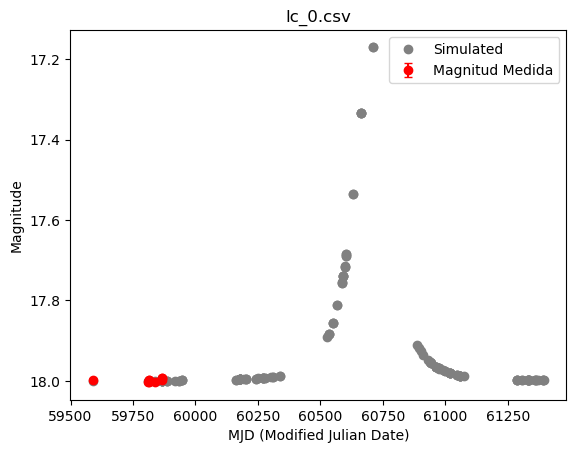

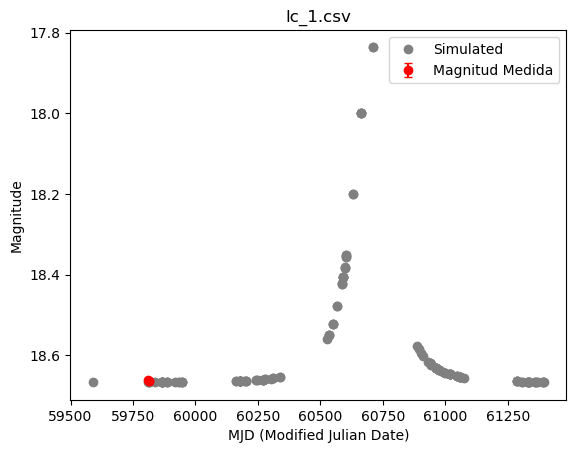

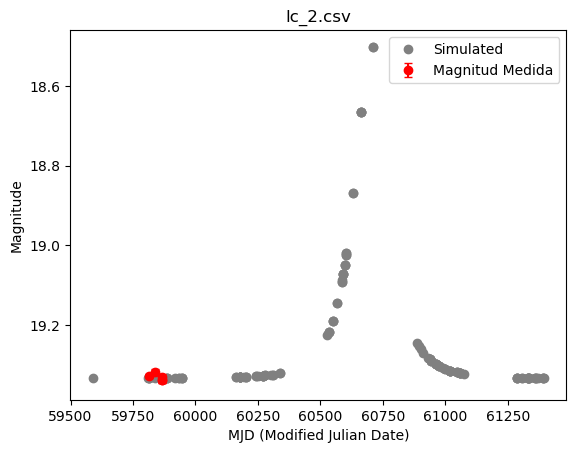

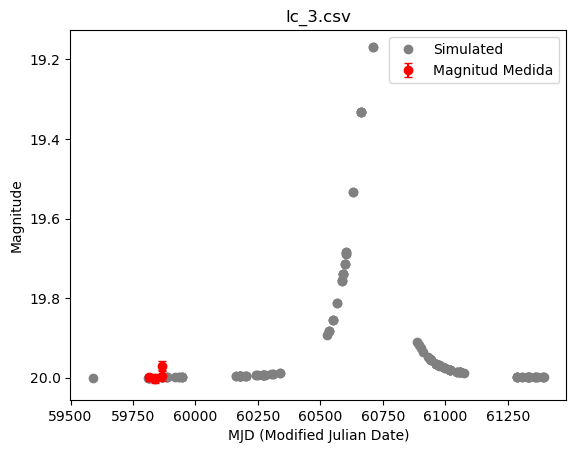

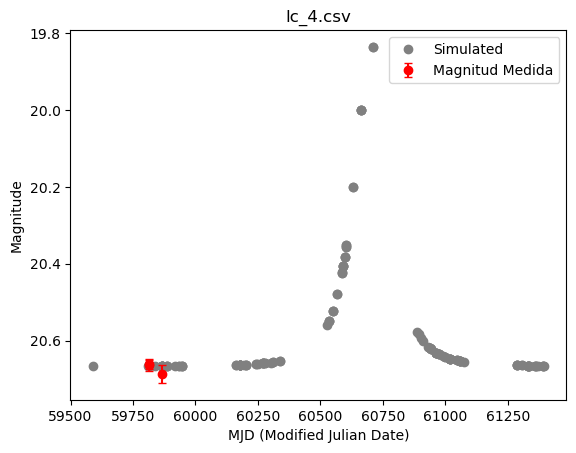

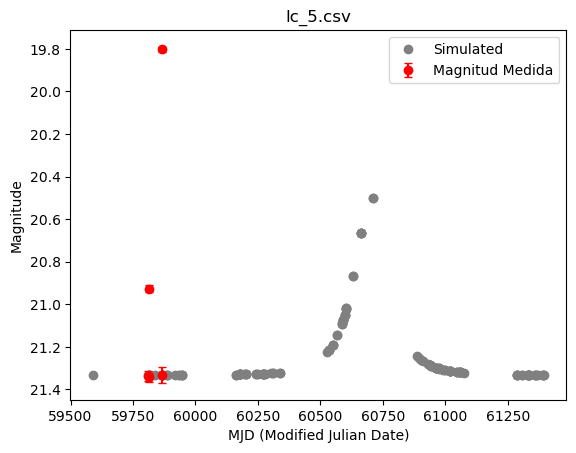

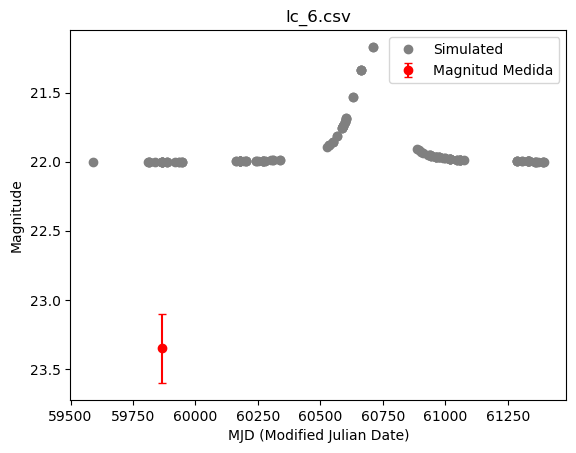

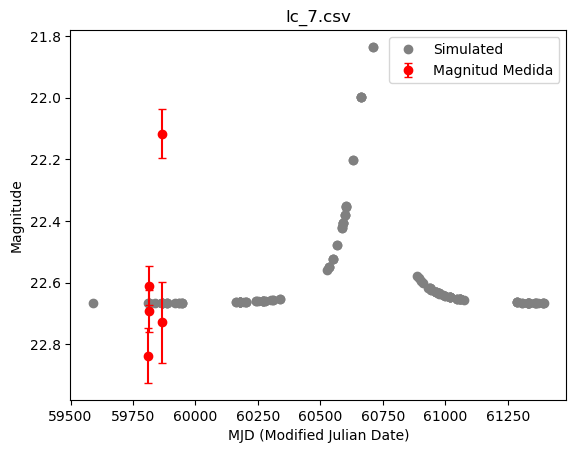

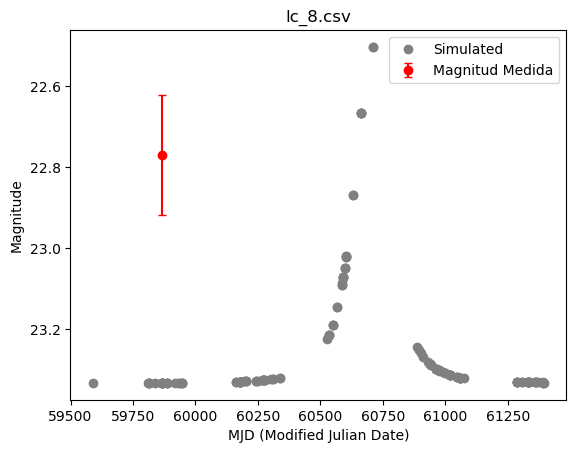

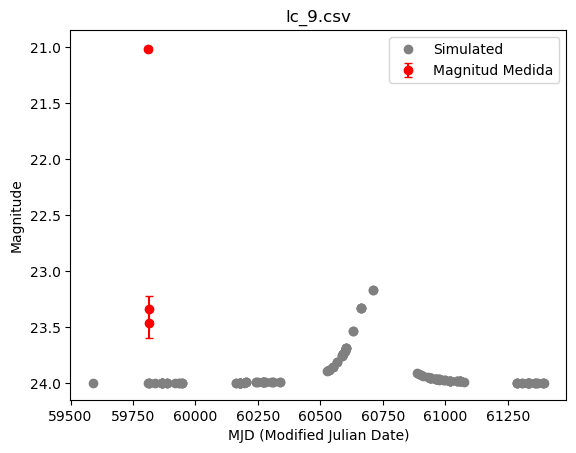

In [3]:
# Plot light curves from a run
import pandas as pd
n=10; lvl = 20
path = f"runs/run_{n}pts_{lvl}lvl/"
for lc_path in sorted([file for file in os.listdir(path) if file.startswith("lc")]):
    lc = LightCurve(data=pd.read_csv(path+lc_path))
    lc.plot(title = lc_path)


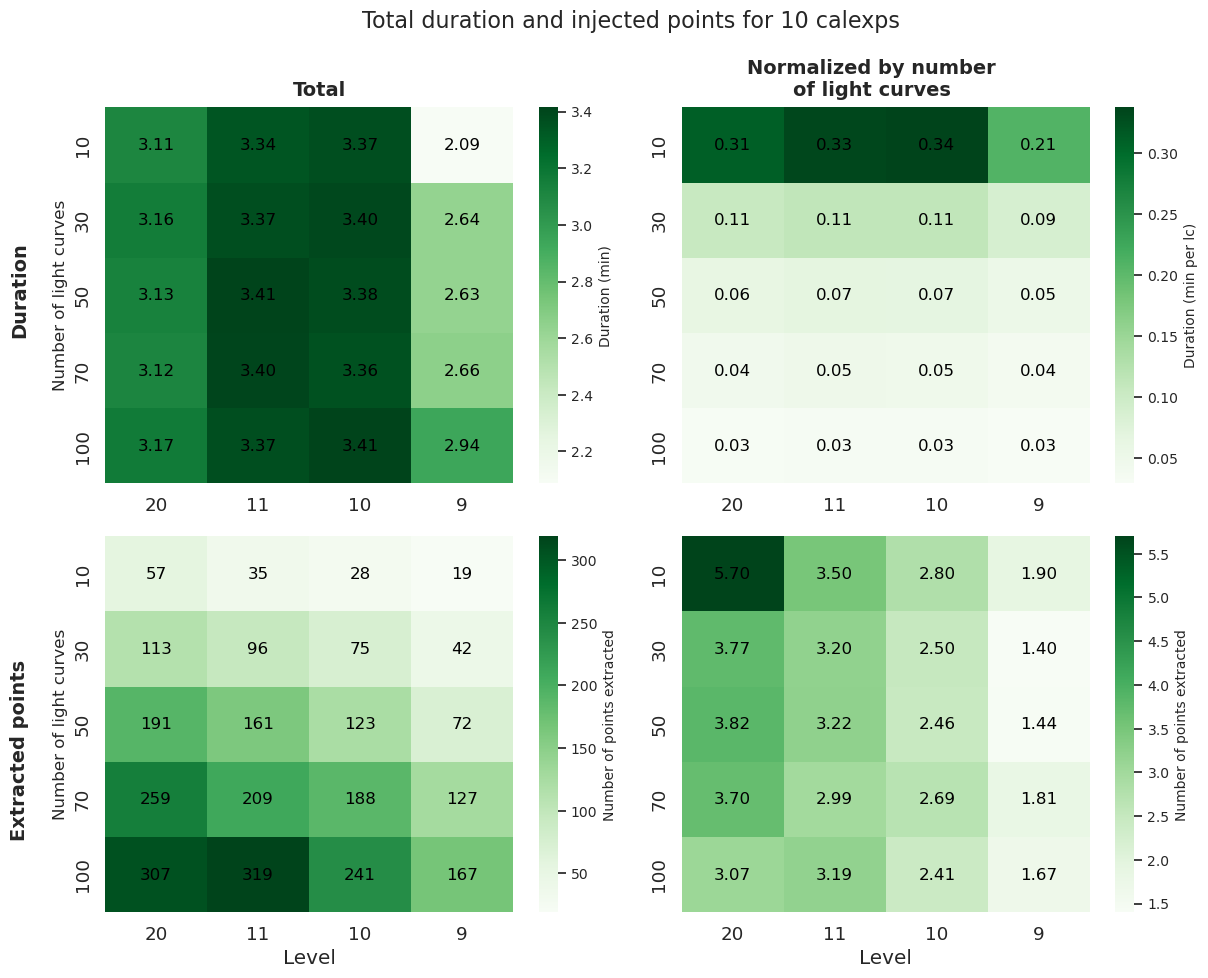

In [132]:
# Total durations and total extracted points per HTM level and points injected
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)


fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
fig.suptitle("Total duration and injected points for 10 calexps", fontsize=16) 

# Gráfico 1: Duration
sns.heatmap(durations, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[0, 0])
cbar = axes[0, 0].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  
cbar.set_label('Duration (min)', fontsize=10)  
axes[0, 0].set_ylabel('Number of light curves', fontsize=12)
# axes[0, 0].set_title('Duration')

# Gráfico 2: Duration - Normalized
sns.heatmap(durations_normalized, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[0, 1])
cbar = axes[0, 1].collections[0].colorbar
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('Duration (min per lc)', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
# axes[0, 1].set_title('Duration - Normalized')

# Gráfico 3: Injected points
sns.heatmap(points, cmap='Greens', annot=True, fmt=".0f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Number of points injected'}, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[1, 0])
cbar = axes[1, 0].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Ajustar el tamaño de los ticks
cbar.set_label('Number of points extracted', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
axes[1, 0].set_xlabel('Level')
axes[1, 0].set_ylabel('Number of light curves', fontsize=12)
# axes[1, 0].set_title('Injected points')

# Gráfico 4: Injected points - Normalized
sns.heatmap(points_normalized, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Number of points injected'}, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[1, 1])
cbar = axes[1, 1].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Ajustar el tamaño de los ticks
cbar.set_label('Number of points extracted', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
axes[1, 1].set_xlabel('Level')
# axes[1, 1].set_title('Injected points - Normalized')

# Etiquetas de las filas y columnas
fig.text(0.24, 0.9, 'Total', ha='center', va='center', fontsize=14, fontweight='bold')
fig.text(0.7, 0.91, 'Normalized by number\nof light curves', ha='center', va='center', fontsize=14, fontweight='bold')

fig.text(-0.01, 0.7, 'Duration', ha='center', va='center', fontsize=14, fontweight='bold', rotation='vertical')
fig.text(-0.01, 0.24, 'Extracted points', ha='center', va='center', fontsize=14, fontweight='bold', rotation='vertical')

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect ajusta el espacio para el título general
plt.savefig('runs/test_10_calexps/comparative_analysis.png', bbox_inches='tight')  # Guardar la figura combinada
plt.show()


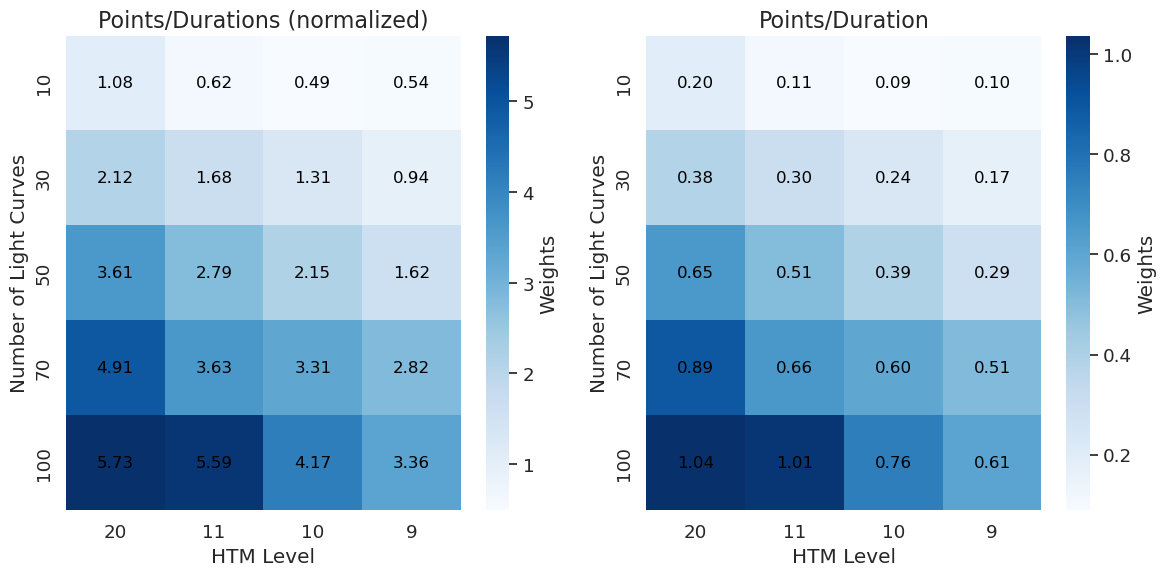

In [144]:
# Optimization index: maximize [extracted_points]/[duration]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_points = [10, 30, 50, 70, 100]
levels = [20, 11, 10, 9]
durations = np.zeros((len(n_points), len(levels)))
durations_normalized = np.zeros((len(n_points), len(levels)))
points = np.zeros((len(n_points), len(levels)))
points_normalized = np.zeros((len(n_points), len(levels)))
weights = np.zeros((len(n_points), len(levels)))

for i, n in enumerate(n_points):
    for j, lvl in enumerate(levels):
        time_path = f"runs/test_10_calexps/run_{n}pts_{lvl}lvl/time_log.csv"
        df = pd.read_csv(time_path)
        points[i, j] = sum(df[df["task"] == "Finding points"]["detail"])
        points_normalized[i, j] = sum(df[df["task"] == "Finding points"]["detail"]) / n
        times = df["time"].values
        total_duration = times[-1] - times[1]
        durations[i, j] = total_duration / 60
        durations_normalized[i, j] = (total_duration / 60) / n

weights_1 = (points_normalized / np.max(points_normalized)) / (durations_normalized / np.max(durations_normalized))
weights_2 = (points / np.max(points)) / (durations / np.max(durations))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(weights_1, cmap='Blues', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Weights'}, annot_kws={'size': 12, 'color': 'black'}, ax=axes[0])
axes[0].set_xlabel('HTM Level')
axes[0].set_ylabel('Number of Light Curves')
axes[0].set_title('Points/Durations (normalized)', fontsize=16)

sns.heatmap(weights_2, cmap='Blues', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Weights'}, annot_kws={'size': 12, 'color': 'black'}, ax=axes[1])
axes[1].set_xlabel('HTM Level')
axes[1].set_ylabel('Number of Light Curves')
axes[1].set_title('Points/Duration', fontsize=16)

plt.tight_layout()
plt.savefig('runs/test_10_calexps/optimization_analysis_combined.png', bbox_inches='tight')
plt.show()


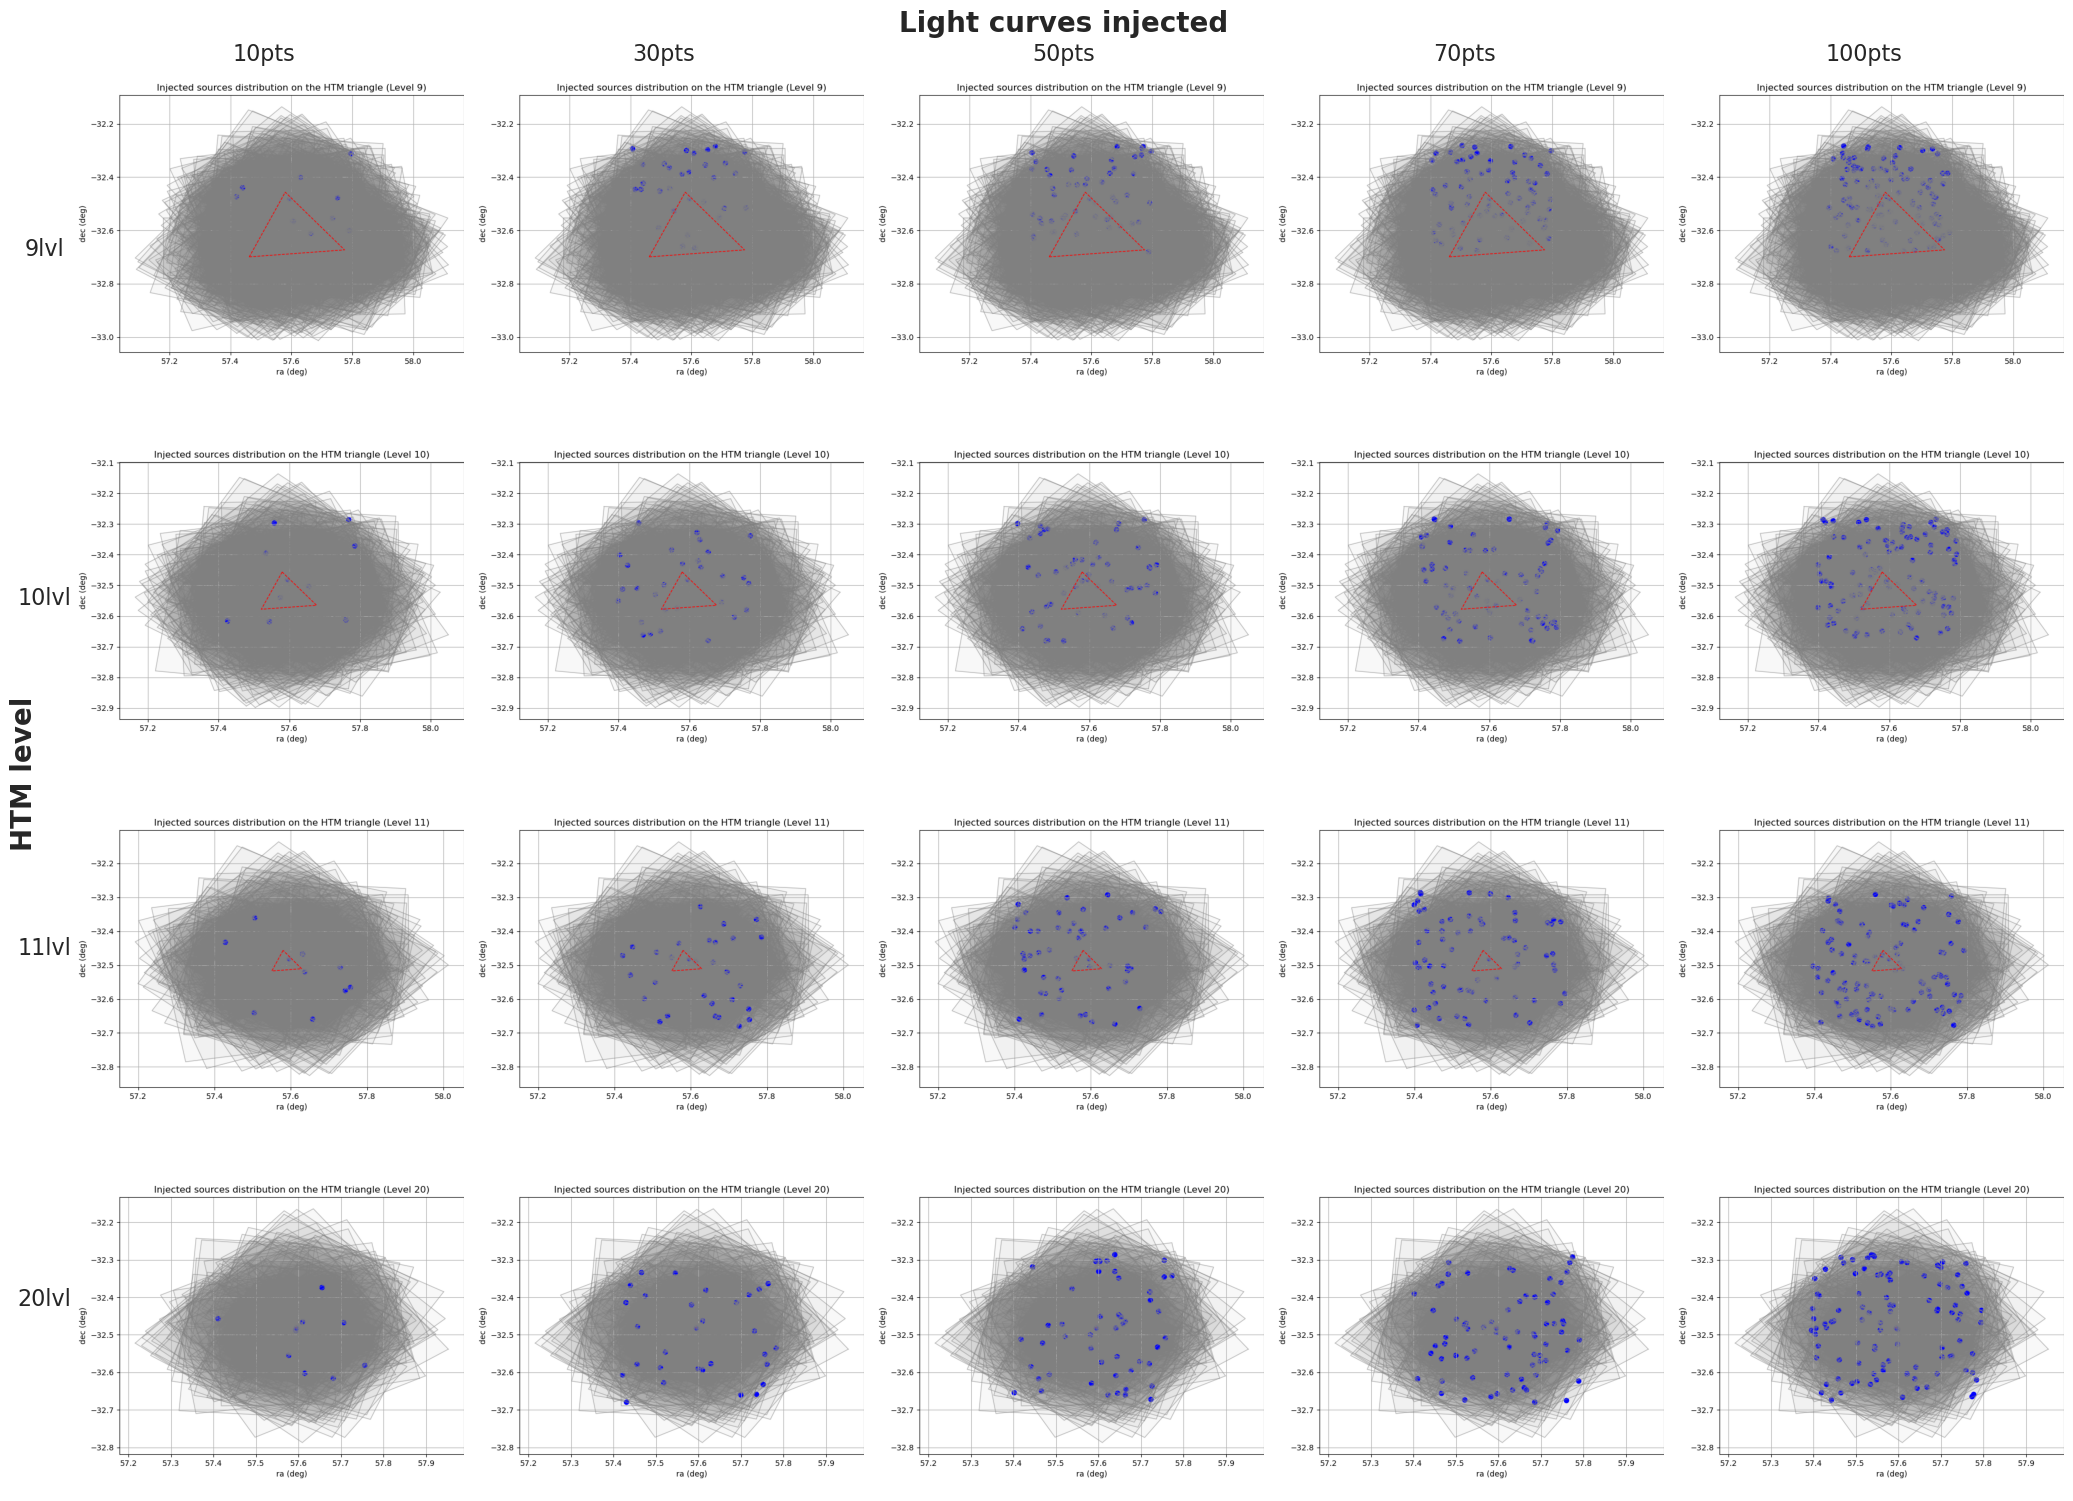

In [133]:
# Sky plots of injected sources + HTM triangle + calexps (for each combination of lvl and n_lc
import os
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

main_folder = "runs/test_10_calexps"
pattern = r"run_(\d+)pts_(\d+)lvl"

plots = []
pts_values = []
lvl_values = []

for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        match = re.match(pattern, subfolder)
        if match:
            pts, lvl = match.groups()
            pts_values.append(int(pts))
            lvl_values.append(int(lvl))
            
            sky_map_path = os.path.join(subfolder_path, "sky_map.png")
            if os.path.exists(sky_map_path):
                plots.append(sky_map_path)

unique_pts = sorted(set(pts_values))  
unique_lvl = sorted(set(lvl_values)) 


fig, axes = plt.subplots(len(unique_lvl), len(unique_pts), figsize=(20, 15))
axes = axes.reshape((len(unique_lvl), len(unique_pts)))
for i, lvl in enumerate(unique_lvl):
    for j, pts in enumerate(unique_pts):
        matching_plots = [plot for plot, p, l in zip(plots, pts_values, lvl_values) if p == pts and l == lvl]
        if matching_plots:
            img = Image.open(matching_plots[0])
            width, height = img.size
            new_width = int(width * 0.9) 
            img_cropped = img.crop((0, 0, new_width, height)) 
            img_cropped = img_cropped.convert("RGB")  
            img_array = np.array(img_cropped)
            ax = axes[i, j]
            ax.imshow(img_array)
            ax.axis('off')

fig.text(0.5, 1, 'Light curves injected', ha='center', va='center', fontsize=20, fontweight='bold')

for i, pts in enumerate(unique_pts):
    fig.text(0.1 + i * (0.8 / (len(unique_pts) - 1)), 0.98, f'{pts}pts', ha='center', va='center', fontsize=16)

fig.text(-0.02, 0.5, 'HTM level', ha='center', va='center', fontsize=20, fontweight='bold', rotation='vertical')

for i, lvl in enumerate(unique_lvl):
    fig.text(-0.01, 0.85 - i * (0.7 / (len(unique_lvl) - 1)), f'{lvl}lvl', ha='center', va='center', fontsize=16)

plt.subplots_adjust(hspace=0.01, wspace=0.01)  
plt.tight_layout(pad=0.01)
plt.savefig(main_folder+"/all_sky_maps.png", bbox_inches='tight')
plt.show()


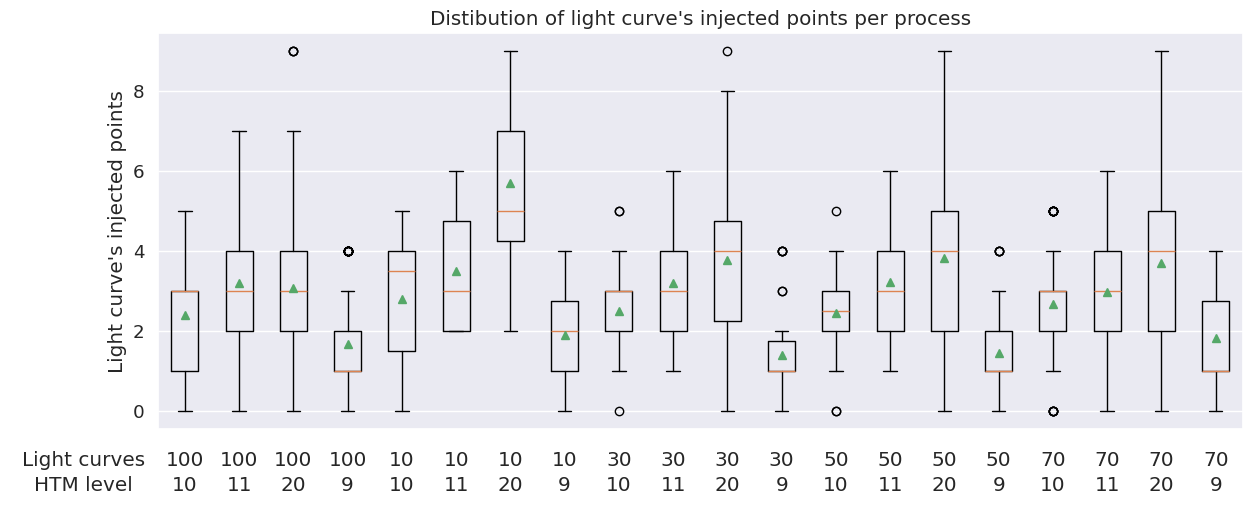

In [67]:
# Distribution of points extracted per light curve for each combination of HMTlevel and injected light curve
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

main_folder = "runs/test_10_calexps"
data_counts = []
pts_values = []
lvl_values = []

for subfolder in sorted([file for file in os.listdir(main_folder) if file.startswith("run")]):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        match = re.match(r'run_(\d+)pts_(\d+)lvl', subfolder)
        if match:
            pts, lvl = match.groups()
            pts_values.append(pts)
            lvl_values.append(lvl)

            mag_counts = []
            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(subfolder_path, file)
                    df = pd.read_csv(file_path)
                    if "mag" in df.columns:
                        mag_count = df["mag"].count() 
                        mag_counts.append(mag_count)
            if mag_counts:
                data_counts.append(mag_counts)

from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(2, 1, height_ratios=[9, 1], hspace=0.1)  

ax_boxplot = fig.add_subplot(gs[0])
ax_boxplot.boxplot(data_counts, showmeans=True)
ax_boxplot.set_ylabel("Light curve's injected points")
ax_boxplot.set_title("Distibution of light curve's injected points per process")
ax_boxplot.set_xticks([])  

ax_table = fig.add_subplot(gs[1])
ax_table.axis("off")  

table_data = [pts_values, lvl_values]
row_labels = ["Light curves", "HTM level"]
table = ax_table.table(cellText=table_data, rowLabels=row_labels,loc="center", cellLoc='center', rowLoc='center')

for cell in table.properties()['celld'].values():
    cell.set_linewidth(0)  

table.scale(1, 1.5) 
plt.savefig(main_folder+"/injected_points_per_lc_analysis.png")
plt.show()

### Sources analysis

Text(0.5, 1.0, 'Number of sources per calexp (total = 36)')

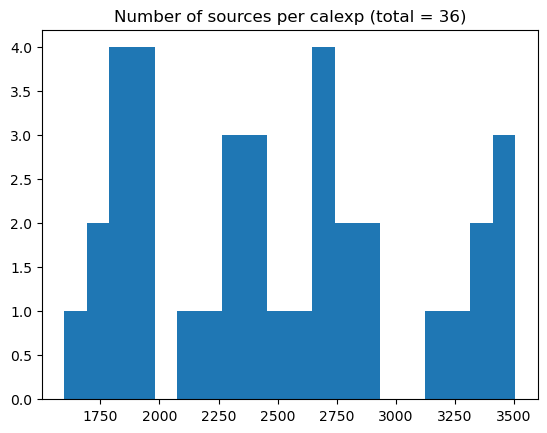

In [17]:
import matplotlib.pyplot as plt
plt.hist(n_sources, bins = 20)
plt.title(f"Number of sources per calexp (total = {len(n_sources)})")

### Collect calexps analysis (Overlap / HTM)
* Inserting into the region (circle / triangle)
* Number of calexps

analysis/overlap_calexps
analysis/htm_calexps

In [1]:
from light_curves import LightCurve
from exposures import Calexp
from task import Run
import numpy as np
import matplotlib.pyplot as plt

#### Defining position to insert (into the region)

||||||||||||||------------LEVEL: 20 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)/nHTM_ID = 9871854450032 - HTM_level=20 (bounded by a circle of radius ~0.27 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 145 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


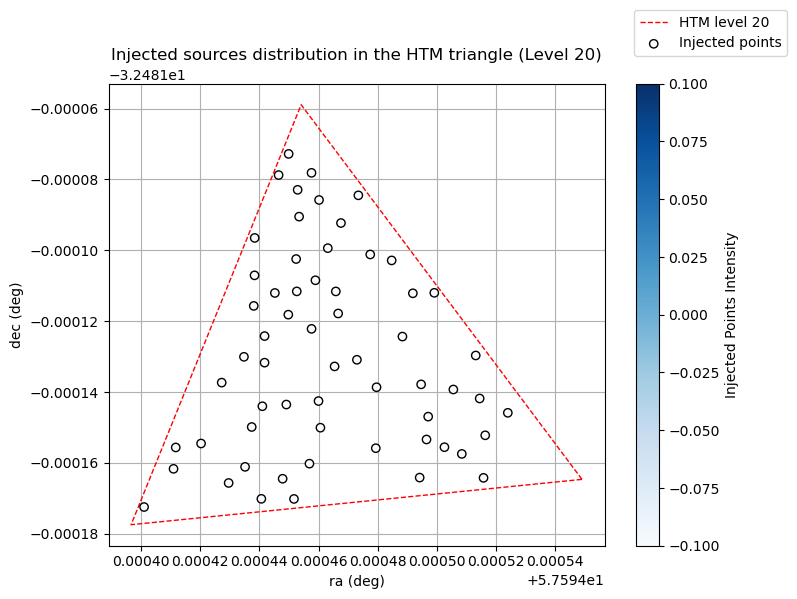

In [8]:
# check triangle injection HTM
ratio_lc_area = [0.05,0.1,0.15]
levels = [20]
problems = []
numb = [60, 25, 40, 55]
for n, lvl in zip(numb,levels):
    print(f"||||||||||||||------------LEVEL: {lvl} -----------||||||||||||||")
    process = Run(name = f"test_triangle", htm_level=lvl)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
    process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145, band="i")
    for p in params[1:]:
        process.add_lc(p, dist=0.0001)
    process.sky_map(calexps=False)

||||||||||||||------------LEVEL: 20 -----------||||||||||||||
Found 171 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


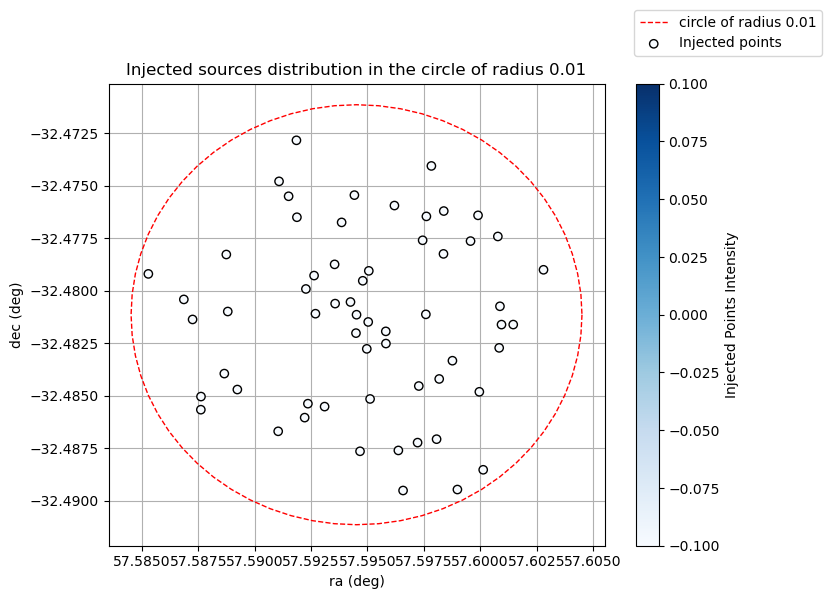

In [7]:
# check circle injection OVERLAP
ratio_lc_area = [0.05,0.1,0.15]
levels = [20]
problems = []
numb = [60, 25, 40, 55]
for n, lvl in zip(numb,levels):
    print(f"||||||||||||||------------LEVEL: {lvl} -----------||||||||||||||")
    process = Run(name = f"test_triangle", query_calexps = "overlap", radius = 1e-2)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
    process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145, band = "i")
    for p in params[1:]:
        process.add_lc(p, dist=0.0001)
    process.sky_map(calexps=False)

#### Number of calexps 
per HTM level or radius

In [38]:
# number of calexps - overlap
radius = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1] #]10**np.arange(-5, 0.25,0.25, dtype=float)
n_calexps = []
n = 1
for rad in radius:
    print(f"||||||||||||||------------RADIUS: {rad} -----------||||||||||||||")
    process = Run(name = f"test_triangle", query_calexps = "overlap", radius = rad)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,20)]
    process.add_lc(params[0], ra=57.59451, dec=-32.48115, band="i")
    n_calexps.append(len(process.calexp_data_ref))


||||||||||||||------------RADIUS: 0.0001 -----------||||||||||||||
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------RADIUS: 0.001 -----------||||||||||||||
Found 148 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------RADIUS: 0.01 -----------||||||||||||||
Found 171 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------RADIUS: 0.1 -----------||||||||||||||
Found 471 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------RADIUS: 0.3 -----------||||||||||||||
Found 1508 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------RADIUS: 0.5 -----------||||||||||||||
Found 3116 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------RADIUS: 0.7 -----------||||||||||||||
Found 5305 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------RADIUS: 1 -----------||||||||||||||
Found 9553 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os


levels = np.array(levels)  # radius
n_calexps = np.array(n_calexps)
radius_arcmin = levels * 60  # to arcmin
area_deg2 = np.pi * levels**2
area_arcmin2 = area_deg2 * 3600  # to arcmin²

output_dir_main = "analysis"
os.makedirs(output_dir_main, exist_ok=True)
output_dir = f"{output_dir_main}/overlap_calexps"
os.makedirs(output_dir, exist_ok=True)

np.savetxt(f"{output_dir}/overlap_n_calexps.txt", np.column_stack((levels, area_deg2, n_calexps)), delimiter="\t", header="radius\tarea\tn_calexps")

plt.figure()
plt.plot(levels, n_calexps, "o-", label="Number of Calexps")
plt.xscale("linear")
plt.yscale("log")
plt.title("Overlap analysis: Radius (degrees) vs Number of Calexps")
plt.xlabel("Radius (degrees)")
plt.ylabel("Number of Calexps (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(f"{output_dir}/radius_vs_calexps_log.png", bbox_inches="tight")
plt.close()

plt.figure()
plt.plot(levels, n_calexps, "o-", label="Number of Calexps")
plt.xscale("linear")
plt.title("Overlap analysis: Radius (degrees) vs Number of Calexps")
plt.xlabel("Radius (degrees)")
plt.ylabel("Number of Calexps (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(f"{output_dir}/radius_vs_calexps.png", bbox_inches="tight")
plt.close()

plt.figure()
plt.plot(radius_arcmin, n_calexps, "o-", label="Number of Calexps")
plt.yscale("log")
plt.title("Overlap analysis: Radius (arcmin) vs Number of Calexps")
plt.xlabel("Radius (arcmin)")
plt.ylabel("Number of Calexps (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(f"{output_dir}/radius_arcmin_vs_calexps_log.png",bbox_inches="tight")
plt.close()
# Gráfico 2: Radius (arcmin) vs Number of Calexps con eje Y logarítmico
plt.figure()
plt.plot(radius_arcmin, n_calexps, "o-", label="Number of Calexps")
plt.title("Overlap analysis: Radius (arcmin) vs Number of Calexps")
plt.xlabel("Radius (arcmin)")
plt.ylabel("Number of Calexps (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(f"{output_dir}/radius_arcmin_vs_calexps.png", bbox_inches="tight")
plt.close()

# Gráfico 3: Area (degrees²) vs Number of Calexps con eje Y logarítmico
plt.figure()
plt.plot(area_deg2, n_calexps, "o-", label="Number of Calexps")
plt.xscale("linear")
plt.yscale("log")
plt.title("Overlap analysis: Area (degrees²) vs Number of Calexps")
plt.xlabel("Area (degrees²)")
plt.ylabel("Number of Calexps (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(f"{output_dir}/area_deg2_vs_calexps_log.png", bbox_inches="tight")
plt.close()

# Gráfico 4: Area (arcmin²) vs Number of Calexps con eje Y logarítmico
plt.figure()
plt.plot(area_arcmin2, n_calexps, "o-", label="Number of Calexps")
plt.xscale("linear")
plt.yscale("log")
plt.title("Overlap analysis: Area (arcmin²) vs Number of Calexps")
plt.xlabel("Area (arcmin²)")
plt.ylabel("Number of Calexps (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(f"{output_dir}/area_arcmin2_vs_calexps_log.png", bbox_inches="tight")
plt.close()

# Gráfico 3: Area (degrees²) vs Number of Calexps con eje Y logarítmico
plt.figure()
plt.plot(area_deg2, n_calexps, "o-", label="Number of Calexps")
plt.xscale("linear")
plt.yscale("log")
plt.title("Overlap analysis: Area (degrees²) vs Number of Calexps")
plt.xlabel("Area (degrees²)")
plt.ylabel("Number of Calexps (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(f"{output_dir}/area_deg2_vs_calexps_log.png", bbox_inches="tight")
plt.close()

# Gráfico 4: Area (arcmin²) vs Number of Calexps con eje Y logarítmico
plt.figure()
plt.plot(area_arcmin2, n_calexps, "o-", label="Number of Calexps")
plt.title("Overlap analysis: Area (arcmin²) vs Number of Calexps")
plt.xlabel("Area (arcmin²)")
plt.ylabel("Number of Calexps (log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.savefig(f"{output_dir}/area_arcmin2_vs_calexps.png", bbox_inches="tight")
plt.close()


All plots have been saved in the 'analysis' directory.


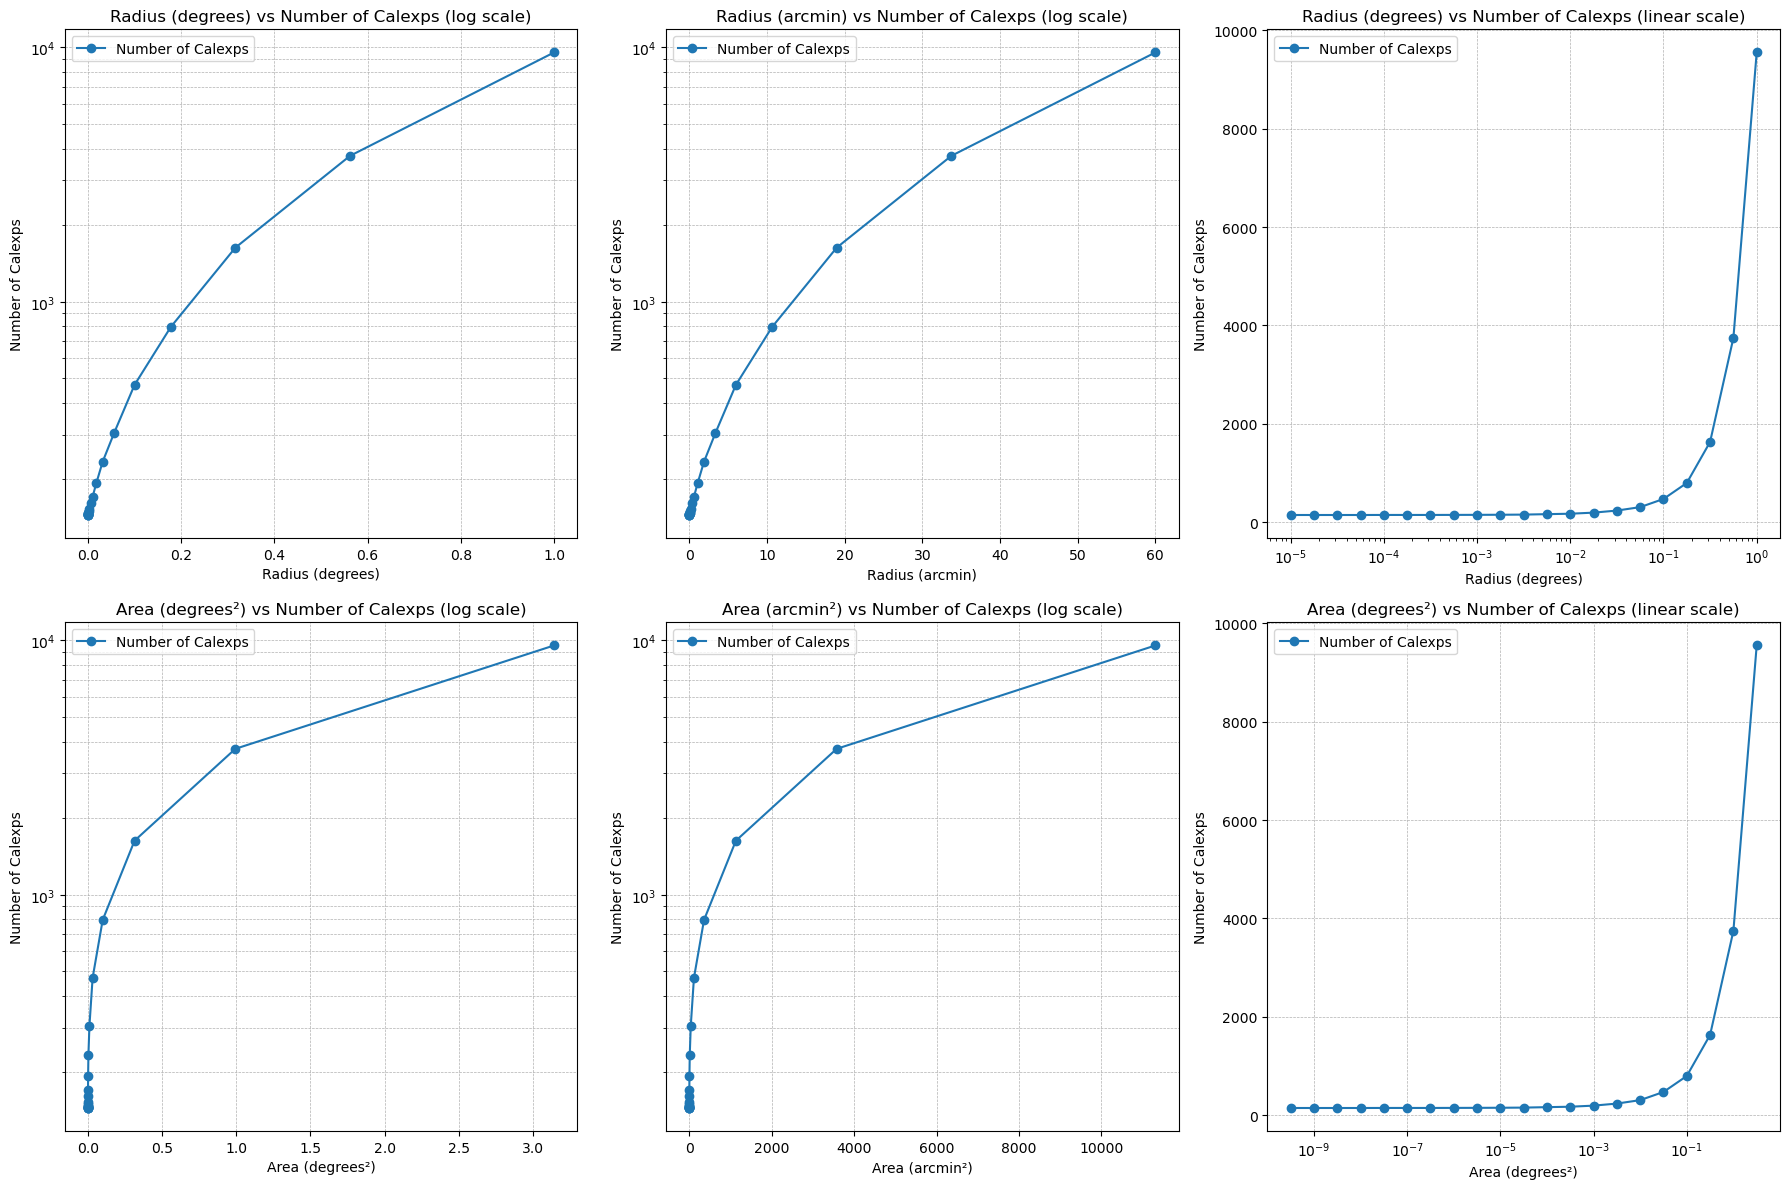

In [56]:
import matplotlib.pyplot as plt
import numpy as np

file_path = "analysis/overlap_calexps/overlap_n_calexps.txt"
data = np.loadtxt(file_path, delimiter="\t", skiprows=1)
levels = data[:, 0]
area_deg2 = data[:, 1]
n_calexps = data[:, 2]
radius_arcmin = levels * 60
area_arcmin2 = area_deg2 * 3600

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].plot(levels, n_calexps, "o-", label="Number of Calexps")
axs[0, 0].set_xscale("linear")
axs[0, 0].set_yscale("log")
axs[0, 0].set_title("Radius (degrees) vs Number of Calexps (log scale)")
axs[0, 0].set_xlabel("Radius (degrees)")
axs[0, 0].set_ylabel("Number of Calexps")
axs[0, 0].grid(True, which="both", linestyle="--", linewidth=0.5)
axs[0, 0].legend()

# Gráfico 2: Radius (arcmin) vs Number of Calexps (log scale)
axs[0, 1].plot(radius_arcmin, n_calexps, "o-", label="Number of Calexps")
axs[0, 1].set_xscale("linear")
axs[0, 1].set_yscale("log")
axs[0, 1].set_title("Radius (arcmin) vs Number of Calexps (log scale)")
axs[0, 1].set_xlabel("Radius (arcmin)")
axs[0, 1].set_ylabel("Number of Calexps")
axs[0, 1].grid(True, which="both", linestyle="--", linewidth=0.5)
axs[0, 1].legend()

# Gráfico 3: Area (degrees²) vs Number of Calexps (log scale)
axs[1, 0].plot(area_deg2, n_calexps, "o-", label="Number of Calexps")
axs[1, 0].set_xscale("linear")
axs[1, 0].set_yscale("log")
axs[1, 0].set_title("Area (degrees²) vs Number of Calexps (log scale)")
axs[1, 0].set_xlabel("Area (degrees²)")
axs[1, 0].set_ylabel("Number of Calexps")
axs[1, 0].grid(True, which="both", linestyle="--", linewidth=0.5)
axs[1, 0].legend()

# Gráfico 4: Area (arcmin²) vs Number of Calexps (log scale)
axs[1, 1].plot(area_arcmin2, n_calexps, "o-", label="Number of Calexps")
axs[1, 1].set_xscale("linear")
axs[1, 1].set_yscale("log")
axs[1, 1].set_title("Area (arcmin²) vs Number of Calexps (log scale)")
axs[1, 1].set_xlabel("Area (arcmin²)")
axs[1, 1].set_ylabel("Number of Calexps")
axs[1, 1].grid(True, which="both", linestyle="--", linewidth=0.5)
axs[1, 1].legend()

# Gráfico 5: Radius (degrees) vs Number of Calexps (linear scale)
axs[0, 2].plot(levels, n_calexps, "o-", label="Number of Calexps")
axs[0, 2].set_xscale("log")
axs[0, 2].set_yscale("linear")
axs[0, 2].set_title("Radius (degrees) vs Number of Calexps (linear scale)")
axs[0, 2].set_xlabel("Radius (degrees)")
axs[0, 2].set_ylabel("Number of Calexps")
axs[0, 2].grid(True, linestyle="--", linewidth=0.5)
axs[0, 2].legend()

axs[1, 2].plot(area_deg2, n_calexps, "o-", label="Number of Calexps")
axs[1, 2].set_xscale("log")
axs[1, 2].set_yscale("linear")
axs[1, 2].set_title("Area (degrees²) vs Number of Calexps (linear scale)")
axs[1, 2].set_xlabel("Area (degrees²)")
axs[1, 2].set_ylabel("Number of Calexps")
axs[1, 2].grid(True, linestyle="--", linewidth=0.5)
axs[1, 2].legend()

# Ajustar diseño y guardar figura
plt.tight_layout()
output_file = "analysis/overlap_calexps/combined_plots_with_linear.png"
plt.savefig(output_file, bbox_inches="tight")
plt.show()


In [35]:
from tools import spherical_area
from lsst.sphgeom import HtmPixelization, UnitVector3d, LonLat
levels = np.arange(6,20)
n_calexps_htm = []
n = 1
vertexs = []
bound_circ = []
ra=57.59451; dec=-32.48115
for lvl in levels:
    print(f"||||||||||||||------------LEVEL: {lvl} -----------||||||||||||||")
    process = Run(name = f"test_triangle", htm_level=lvl)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
    process.add_lc(params[0], ra=57.59451, dec=-32.48115, band="i")
    n_calexps_htm.append(len(process.calexp_data_ref))
    pixelization = HtmPixelization(lvl)
    htm_id = pixelization.index(UnitVector3d(LonLat.fromDegrees(ra, dec)))
    htm_triangle = pixelization.triangle(htm_id)
    r = htm_triangle.getBoundingCircle().getOpeningAngle().asDegrees()
    bound_circ.append(r)
    vertexs.append(htm_triangle.getVertices())

||||||||||||||------------LEVEL: 6 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 36775 - HTM_level=6 (bounded by a circle of radius ~4489.73 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 16636 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 7 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 147102 - HTM_level=7 (bounded by a circle of radius ~2245.02 arcsec.)
Found 6894 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 8 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 588408 - HTM_level=8 (bounded by a circle of radius ~1122.53 arcsec.)
Found 2697 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 9 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 2353633 - HTM_level=9 (bounded by a circle of radius ~561.27 arcsec.)
Found 514 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 10 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 9414534 - HTM_level=10 (bounded by a circle of radius ~280.63 arcsec.)
Found 313 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 11 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 37658136 - HTM_level=11 (bounded by a circle of radius ~140.32 arcsec.)
Found 229 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 12 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 150632544 - HTM_level=12 (bounded by a circle of radius ~70.16 arcsec.)
Found 187 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 13 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 602530178 - HTM_level=13 (bounded by a circle of radius ~35.08 arcsec.)
Found 167 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 14 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 2410120715 - HTM_level=14 (bounded by a circle of radius ~17.54 arcsec.)
Found 155 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 15 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 9640482861 - HTM_level=15 (bounded by a circle of radius ~8.77 arcsec.)
Found 150 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 16 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 38561931445 - HTM_level=16 (bounded by a circle of radius ~4.38 arcsec.)
Found 148 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 17 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 154247725781 - HTM_level=17 (bounded by a circle of radius ~2.19 arcsec.)
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 18 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 616990903127 - HTM_level=18 (bounded by a circle of radius ~1.10 arcsec.)
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 19 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 2467963612508 - HTM_level=19 (bounded by a circle of radius ~0.55 arcsec.)
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(radius, n_calexps, "o-", label = "radius overlap")
plt.plot(bound_circ, n_calexps_htm, "o-", label = "radius htm")
plt.xscale("log")
plt.ylabel("Number of calexp")
plt.xlabel("Radius (arcsec)")
plt.legend()
plt.grid()
plt.savefig("analysis/comparison_radius_OVERLAP_HTM.png", bbox_inches="tight")
plt.figure()
plt.title("Areas comparison OVERLAP and HTM")
area_overlap = (np.array(radius)**2)*np.pi
area_htm_circ = (np.array(bound_circ)**2)*np.pi
area_htm_tri  = np.pi/(2*4**(levels-1)) *(180/np.pi)**2 # Area of HTM triangles in degrees²  https://arxiv.org/pdf/cs/0701164
plt.plot(area_overlap, n_calexps, "o-", label = "overlap")
plt.plot(area_htm_circ, n_calexps_htm, "o-", label = "circle htm")
plt.plot(area_htm_tri, n_calexps_htm, "o-", label = "triangle htm")
plt.xlabel("Area (arcsec²)")
plt.ylabel("Number of calexp")
plt.xscale("log")
plt.grid()
plt.legend()
plt.savefig("analysis/comparison_areas_OVERLAP_HTM.png", bbox_inches="tight")

NameError: name 'radius' is not defined

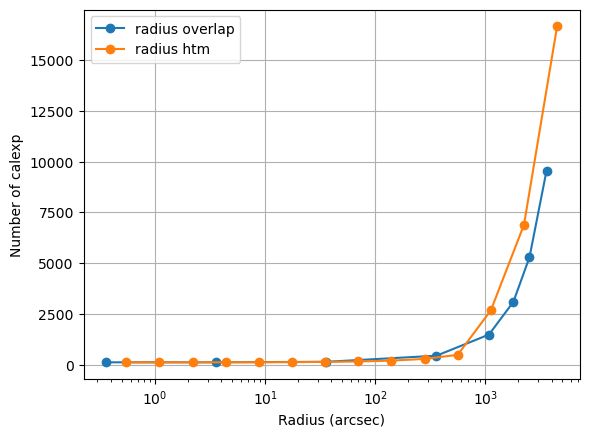

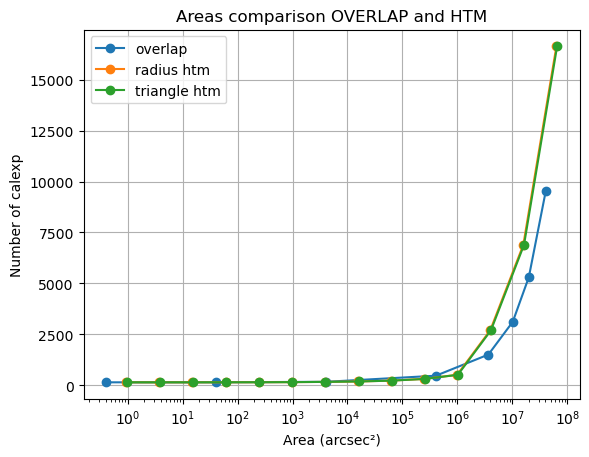

In [49]:
import matplotlib.pyplot as plt
import numpy as np

deg_to_arcsec = 3600
deg2_to_arcsec2 = deg_to_arcsec**2
radius_arcsec = np.array(radius) * deg_to_arcsec 
bound_circ_arcsec = np.array(bound_circ) * deg_to_arcsec  

plt.plot(radius_arcsec, n_calexps, "o-", label="radius overlap")
plt.plot(bound_circ_arcsec, n_calexps_htm, "o-", label="radius htm")
plt.xscale("log")
plt.ylabel("Number of calexp")
plt.xlabel("Radius (arcsec)")
plt.legend()
plt.grid()
plt.savefig("analysis/comparison_radius_OVERLAP_HTM_arcsec.png", bbox_inches="tight")

plt.figure()
plt.title("Areas comparison OVERLAP and HTM")
area_overlap_arcsec2 = (np.array(radius_arcsec)**2) * np.pi 
area_htm_rad_arcsec2 = (np.array(bound_circ_arcsec)**2) * np.pi  
area_htm_tri_arcsec2 = (np.pi / (2 * 4**(levels - 1)) * (180 / np.pi)**2) * deg2_to_arcsec2

plt.plot(area_overlap_arcsec2, n_calexps, "o-", label="overlap")
plt.plot(area_htm_rad_arcsec2, n_calexps_htm, "o-", label="radius htm")
plt.plot(area_htm_tri_arcsec2, n_calexps_htm, "o-", label="triangle htm")
plt.xscale("log")
plt.xlabel("Area (arcsec²)")
plt.ylabel("Number of calexp")
plt.grid()
plt.legend()
plt.savefig("analysis/comparison_areas_OVERLAP_HTM_arcsec2.png", bbox_inches="tight")


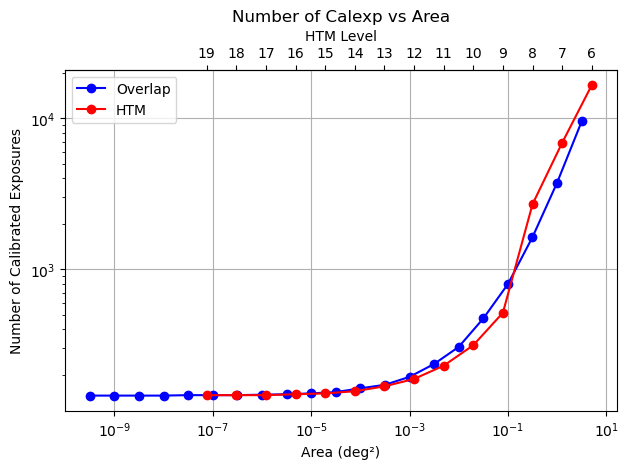

In [100]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots()
ax1.plot(area_deg2_overlap, n_calexps_overlap, "bo-", label="Overlap")
ax1.plot(htm_area_deg2, n_calexps_htm, "ro-", label="HTM")
ax1.set_xlabel("Area (deg²)")
ax1.set_ylabel("Number of Calibrated Exposures")
ax1.legend()
ax1.grid()
ax1.set_xscale("log")
ax1.set_yscale("log")
secax = ax1.secondary_xaxis('top')
secax.set_xlabel("HTM Level")
secax.set_xticks(htm_area_deg2)  # Usa las mismas posiciones de las áreas en el eje inferior
secax.set_xticklabels(levels)  # Asigna los niveles HTM como etiquetas
plt.title("Number of Calexp vs Area")
plt.tight_layout()
plt.show()


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from lsst.sphgeom import HtmPixelization, UnitVector3d, LonLat

# Asumimos que 'vertexs' y 'bound_circ' ya están calculados, como en el código original
levels = np.arange(9, 21)
n_calexps_htm = []
n = 1
vertexs = []
bound_circ = []
ra = 57.59451
dec = -32.48115
for lvl in levels:
    print(f"||||||||||||||------------LEVEL: {lvl} -----------||||||||||||||")
    process = Run(name=f"test_triangle", htm_level=lvl)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18, 24, n)]
    process.add_lc(params[0], ra=ra, dec=dec, band="i")
    n_calexps_htm.append(len(process.calexp_data_ref))
    pixelization = HtmPixelization(lvl)
    htm_id = pixelization.index(UnitVector3d(LonLat.fromDegrees(ra, dec)))
    htm_triangle = pixelization.triangle(htm_id)
    r = htm_triangle.getBoundingCircle().getOpeningAngle().asDegrees()
    bound_circ.append(r)
    vertexs.append(htm_triangle.getVertices())
    data = process.calexp_data_ref[0].dataId
    calexp = Calexp({"visit":data["visit"], "detector":data["detector"]})
    exposureF = calexp.expF  # se guarda el objeto exposureF en exposureF



||||||||||||||------------LEVEL: 9 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 2353633 - HTM_level=9 (bounded by a circle of radius ~561.27 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 514 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 10 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 9414534 - HTM_level=10 (bounded by a circle of radius ~280.63 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 313 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 11 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 37658136 - HTM_level=11 (bounded by a circle of radius ~140.32 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 229 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 12 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 150632544 - HTM_level=12 (bounded by a circle of radius ~70.16 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 187 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 13 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 602530178 - HTM_level=13 (bounded by a circle of radius ~35.08 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 167 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 14 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 2410120715 - HTM_level=14 (bounded by a circle of radius ~17.54 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 155 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 15 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 9640482861 - HTM_level=15 (bounded by a circle of radius ~8.77 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 150 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 16 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 38561931445 - HTM_level=16 (bounded by a circle of radius ~4.38 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 148 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 17 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 154247725781 - HTM_level=17 (bounded by a circle of radius ~2.19 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 18 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 616990903127 - HTM_level=18 (bounded by a circle of radius ~1.10 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 19 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 2467963612508 - HTM_level=19 (bounded by a circle of radius ~0.55 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 20 -----------||||||||||||||
(ra,dec) = (57.59451, -32.48115)/nHTM_ID = 9871854450032 - HTM_level=20 (bounded by a circle of radius ~0.27 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 145 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


In [15]:
process.calexp_data_ref[0].dataId

{instrument: 'LSSTCam-imSim', detector: 117, visit: 6855, band: 'i', physical_filter: 'i_sim_1.4', visit_system: 1}

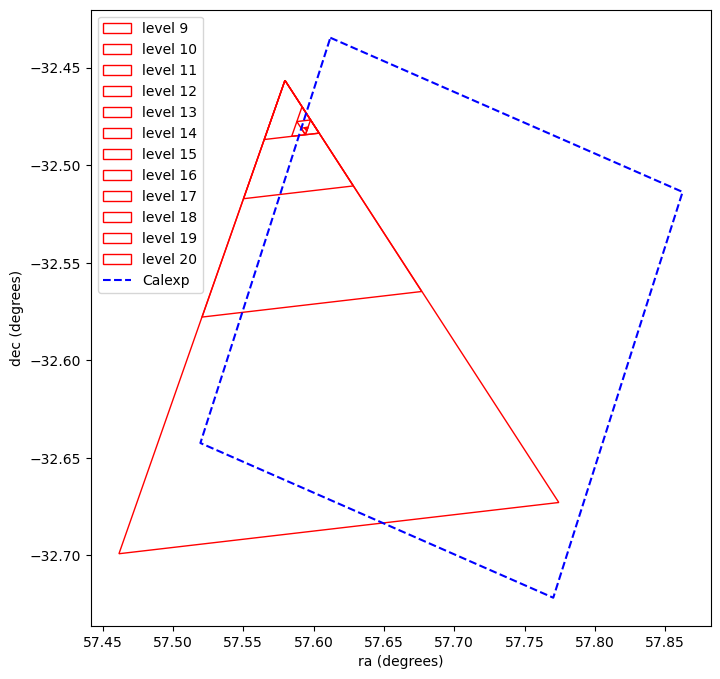

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from lsst.sphgeom import HtmPixelization, UnitVector3d, LonLat

# Función para convertir coordenadas cartesianas a RA/Dec
def unit_vector_to_ra_dec(unit_vector):
    lonlat = LonLat.fromRadians(np.arctan2(unit_vector[1], unit_vector[0]), np.arcsin(unit_vector[2]))
    return lonlat.getLon().asDegrees(), lonlat.getLat().asDegrees()

# Obtener las coordenadas RA/Dec de los vértices del triángulo
ra_values = []
dec_values = []

for triangle in vertexs:
    for vertex in triangle:
        ra, dec = unit_vector_to_ra_dec(vertex)
        ra_values.append(ra)
        dec_values.append(dec)

# Graficar el triángulo
fig, ax = plt.subplots(figsize=(8, 8))

# Dibujar el triángulo:
for j, i in zip(levels,range(0, len(ra_values), 3)):
    ra_triangle = ra_values[i:i+3]
    dec_triangle = dec_values[i:i+3]
    ax.fill(ra_triangle + [ra_triangle[0]], dec_triangle + [dec_triangle[0]], edgecolor="r", facecolor="none", label=f"level {j}")

# Obtener las dimensiones de la calexp y dibujar su borde (como un rectángulo)

data = process.calexp_data_ref[0].dataId
calexp = Calexp({"visit":data["visit"], "detector":data["detector"]})
# exposureF = calexp.expF  # se guarda el objeto exposureF en exposureF
image_width, image_height = calexp.expF.getWidth(), calexp.expF.getHeight()

# Obtener la escala en píxeles por arcsec (pix/arcsec)
pixel_scale = calexp.expF.getWcs().getPixelScale() # En arcsec/píxel

# Obtener las dimensiones de la calexp
image_width, image_height = calexp.expF.getWidth(), calexp.expF.getHeight()

# Coordenadas centrales (RA, Dec) de la calexp
ra_center, dec_center = 57.59451, -32.48115  # Ajustar a las coordenadas reales del centro

# Calcular las coordenadas de las esquinas de la imagen en píxeles
x_min, x_max = 0, image_width
y_min, y_max = 0, image_height

# Convertir las esquinas a RA/Dec
def pixel_to_ra_dec(x, y, image_width, image_height, ra_center, dec_center, pixel_scale):
    # Convertir de píxeles a arcsec y luego a coordenadas RA/Dec
    delta_ra = (x - image_width / 2) * pixel_scale  
    delta_dec = (y - image_height / 2) * pixel_scale
    print(type(ra_center), type(delta_ra))
    ra = ra_center + delta_ra.asDegrees()
    print(delta_ra)
    dec = dec_center + delta_dec.asDegrees()
    return ra, dec

# Convertir las esquinas de la imagen a coordenadas RA/Dec
ra_min, dec_min = calexp.pix_to_sky(x_min,y_min)
ra_max, dec_min2 = calexp.pix_to_sky(x_max,y_min)
ra_min2, dec_max = calexp.pix_to_sky(x_min,y_max)
ra_max2, dec_max2 = calexp.pix_to_sky(x_max,y_max)

# Graficar el borde de la calexp (rectángulo)
ra_values_calexp = [ra_min, ra_max, ra_max2, ra_min2, ra_min]
dec_values_calexp = [dec_min, dec_min2, dec_max2, dec_max, dec_min]
ax.plot(ra_values_calexp, dec_values_calexp, 'b--', label="Calexp")


# Etiquetas y leyenda
ax.set_xlabel("ra (degrees)")
ax.set_ylabel("dec (degrees)")
ax.legend()

plt.show()


In [53]:
image_width*pixel_scale

Angle(0.22580330200244383, degrees)

In [57]:
calexp.expF.getWcs().getPixelScale()

Angle(5.5452677309048091e-05, degrees)